In [97]:
"""username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding 
using CairoMakie, GLMakie

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")"""

"username = \"nova\"\npathtorepo = \"/home/nova/work/repo_ds/dynamical-systems\"\nusing Pkg\nPkg.activate(pathtorepo * \"/env/integrate/\")\n\nusing StaticArrays, DifferentialEquations, DynamicalSystems, IntervalRootFinding \nusing CairoMakie, GLMakie\n\ninclude(\"/home/nova/work/repo_ds/dynamical-systems/system.jl\")\ninclude(\"/home/nova/work/repo_ds/dynamical-systems/visual.jl\")"

In [98]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [99]:
time = 3000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [100]:
u0 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [101]:
"""for elem in dict
    println(elem);
end;"""
;

In [102]:
param[11] =  -1.706095

-1.706095

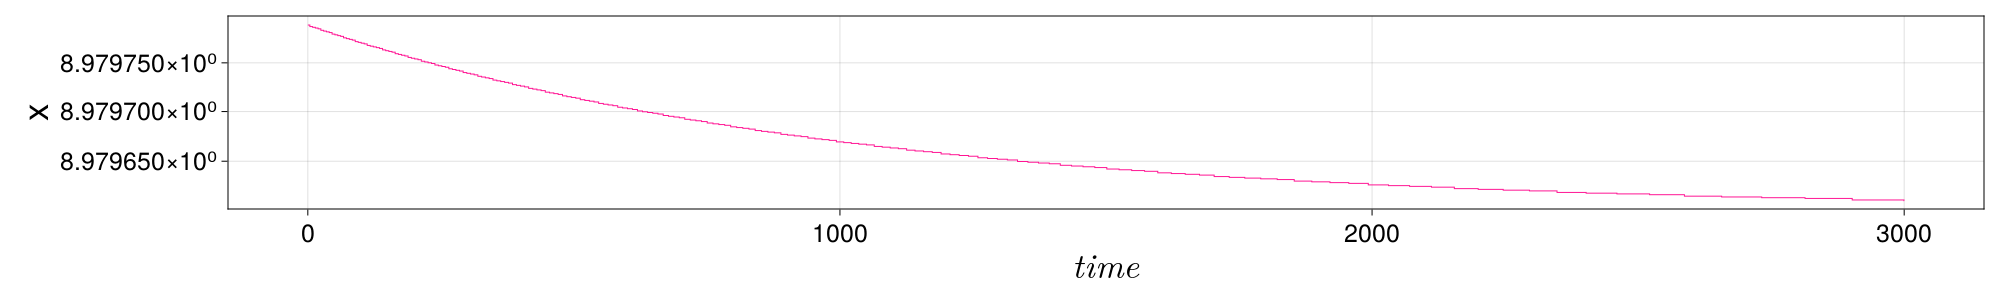

CairoMakie.Screen{IMAGE}


In [110]:
ds= CoupledODEs(TM6_glial_ECM, tr[end], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);
plot_timesereis(trange, tr[:, 1], 1, 3000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

In [104]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(-1.0, 1.0), interval(-1.0, 1.0), interval(-1.0, 1.0);
ecmr, pr = interval(-1.0, 1.0), interval(-1.0, 1.0);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-15, method = IntervalRootFinding.Krawczyk);

In [105]:
fp

6-dimensional StateSpaceSet{Float64} with 5 points
  8.9796    0.478082  0.810497  0.000170577  7.56859e-48   1.45442e-148
  2.88015   0.787534  0.624473  0.0752199    1.65691e-65  -3.15899e-122
  0.969484  0.923672  0.568239  0.485812     4.86802e-71   5.31215e-106
 25.9279    0.218386  0.920259  9.46931e-7   0.446651      0.191274
 25.1323    0.224173  0.91803   1.06314e-6   0.4238        2.90771e-8

In [106]:
eigs[1]

6-element Vector{ComplexF64}:
   -3.285793700809248 + 0.0im
  -0.5555555555558793 + 0.0im
                -0.01 + 0.0im
               -0.001 + 0.0im
 9.266292262299913e-5 - 20.128526564403476im
 9.266292262299913e-5 + 20.128526564403476im

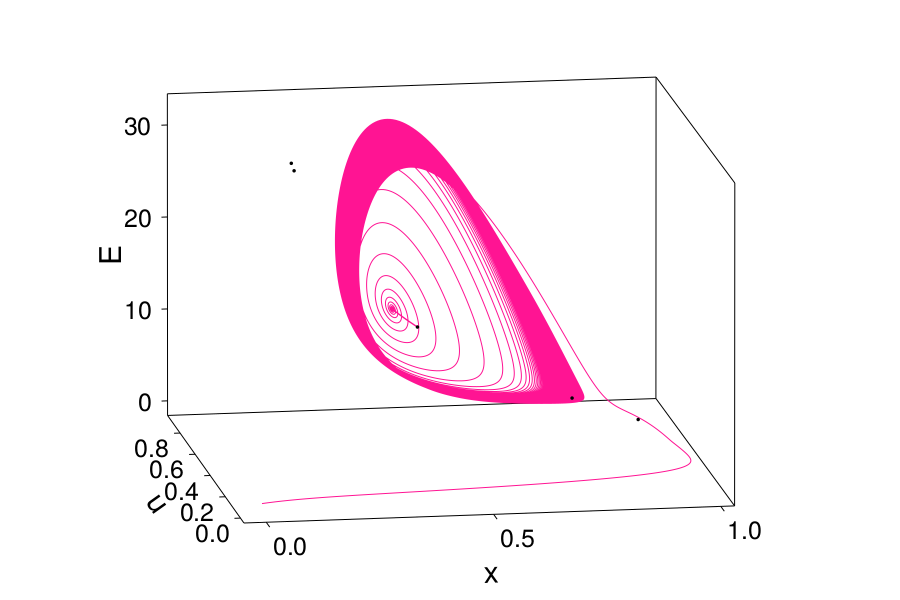

In [107]:
idx, idy, idz = 2, 3, 1
data = [tr[:, idx], tr[:, idy], tr[:, idz]]
plot_3d_fp(data, [fp, idx, idy, idz], 1, 3000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "x", yl = "u", zl = "E", color = :deeppink);